## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
sns.set()

## Generating the Dataset

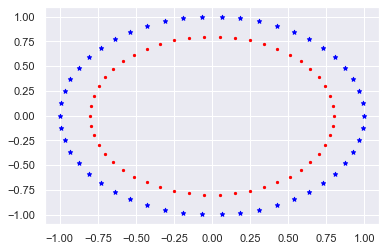

In [2]:
def second_order(X):
    X=np.concatenate((X**2,X),axis=1)
    X=np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
    return X
X, Y = make_circles(n_samples=100)
X=second_order(X)

pos_data=X[Y==1]
neg_data=X[Y==0]
plt.scatter(pos_data[:,3],pos_data[:,4],s=20,marker='.',color='red',label='Y=1')
plt.scatter(neg_data[:,3],neg_data[:,4],s=20,marker='*',color='blue',label='Y=0')

## Perceptron

In [3]:
def Perceptron(X,Y):
    w=np.random.uniform(1,100,size=X.shape[1])
    false_found=True
    iter=0
    while false_found:
        false_found=False
        for i in range(X.shape[0]):
            parity=np.sum(X[i]*w)>=0
            if parity!=Y[i]:
                if Y[i]>0:
                    w+=X[i]
                else:
                    w-=X[i]
                false_found=True
        iter+=1
    return w
w=Perceptron(X,Y)

## Contours

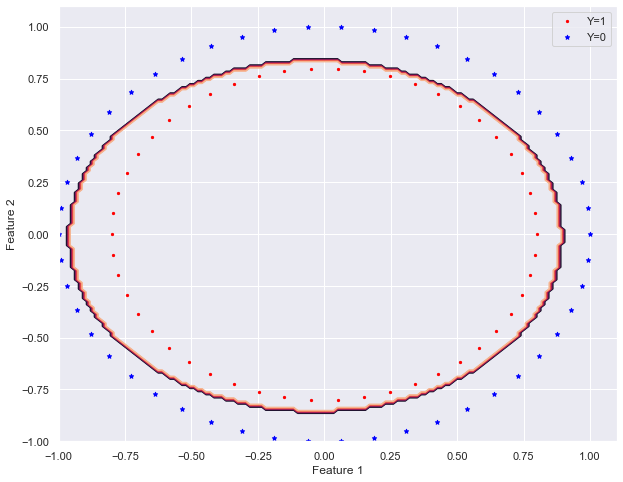

In [4]:
u,v=np.meshgrid(np.arange(-1,1,0.015),np.arange(-1,1,0.015))
x=u.ravel()
y=v.ravel()
data=np.array([[x,y] for x,y in zip(x,y)])
data=second_order(data)
Z=np.array([1 if prod>=0 else 0 for prod in np.dot(data,w.T)])
Z=Z.reshape((len(Z),1))
Z=Z.reshape(u.shape)

plt.figure(figsize=(10,8))
plt.scatter(pos_data[:,3],pos_data[:,4],s=20,marker='.',color='red',label='Y=1')
plt.scatter(neg_data[:,3],neg_data[:,4],s=20,marker='*',color='blue',label='Y=0')
plt.contour(u,v,Z)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()